In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error
from pandas.plotting import scatter_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
df = pd.read_csv('data/train.csv', sep = ';')
# sep = ';' permet de créer un vrai tableau en séparant les données attribut par attribut
print(df.shape)

# set "color" as a categorical variable 
df['color'] = pd.Categorical(df['color'])

(4547, 14)


In [29]:
print(df.head()) # print les 5 premières lignes
print(df.info()) # infos sur les types des attributs
print(df.describe()) # stats sur les attributs

   id  color  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0  white            6.4              0.13         0.47             1.6   
1   1  white            6.2              0.33         0.14             4.8   
2   2  white            6.3              0.32         0.32             1.5   
3   3  white            6.6              0.16         0.34             1.1   
4   4  white            6.3              0.26         0.42             7.1   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.092                 40.0                 158.0  0.99280  3.21   
1      0.052                 27.0                 128.0  0.99475  3.21   
2      0.030                 24.0                 101.0  0.98923  3.21   
3      0.037                 41.0                 115.0  0.98990  3.01   
4      0.045                 62.0                 209.0  0.99544  3.20   

   sulphates  alcohol  quality  
0       0.36      9.8        6  
1       0.48      9.

In [4]:
# Séparer les rouges des blancs car on peut supposer que 
# les attributs n'auront pas la même influence sur chacun des deux type de vins
white = df[df['color'] == 'white']
red = df[df['color'] == 'red']

# On peut drop la colonne 'color' puisque les données sont séparées
white.drop('color', axis=1, inplace=True)
red.drop('color', axis=1, inplace=True)

/Users/augustin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
print(white.head()) # print les 5 premières lignes
print(white.info()) # infos sur les attributs
print(white.describe()) # stats sur les attributs

   id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0            6.4              0.13         0.47             1.6   
1   1            6.2              0.33         0.14             4.8   
2   2            6.3              0.32         0.32             1.5   
3   3            6.6              0.16         0.34             1.1   
4   4            6.3              0.26         0.42             7.1   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.092                 40.0                 158.0  0.99280  3.21   
1      0.052                 27.0                 128.0  0.99475  3.21   
2      0.030                 24.0                 101.0  0.98923  3.21   
3      0.037                 41.0                 115.0  0.98990  3.01   
4      0.045                 62.0                 209.0  0.99544  3.20   

   sulphates  alcohol  quality  
0       0.36      9.8        6  
1       0.48      9.4        5  
2       0.42     13.0        

In [6]:
print(red.head())
print(red.info())
print(red.describe())

    id  fixed acidity  volatile acidity  citric acid  residual sugar  \
6    6           10.2             0.410         0.43             2.2   
8    8            7.0             0.500         0.25             2.0   
13  13            8.3             0.310         0.39             2.4   
14  14            7.5             1.115         0.10             3.1   
15  15            8.5             0.585         0.18             2.1   

    chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
6       0.110                 11.0                  37.0  0.99728  3.16   
8       0.070                  3.0                  22.0  0.99630  3.25   
13      0.078                 17.0                  43.0  0.99444  3.31   
14      0.086                  5.0                  12.0  0.99580  3.54   
15      0.078                  5.0                  30.0  0.99670  3.20   

    sulphates  alcohol  quality  
6        0.67     10.8        5  
8        0.63      9.2        5  
13       0.77 

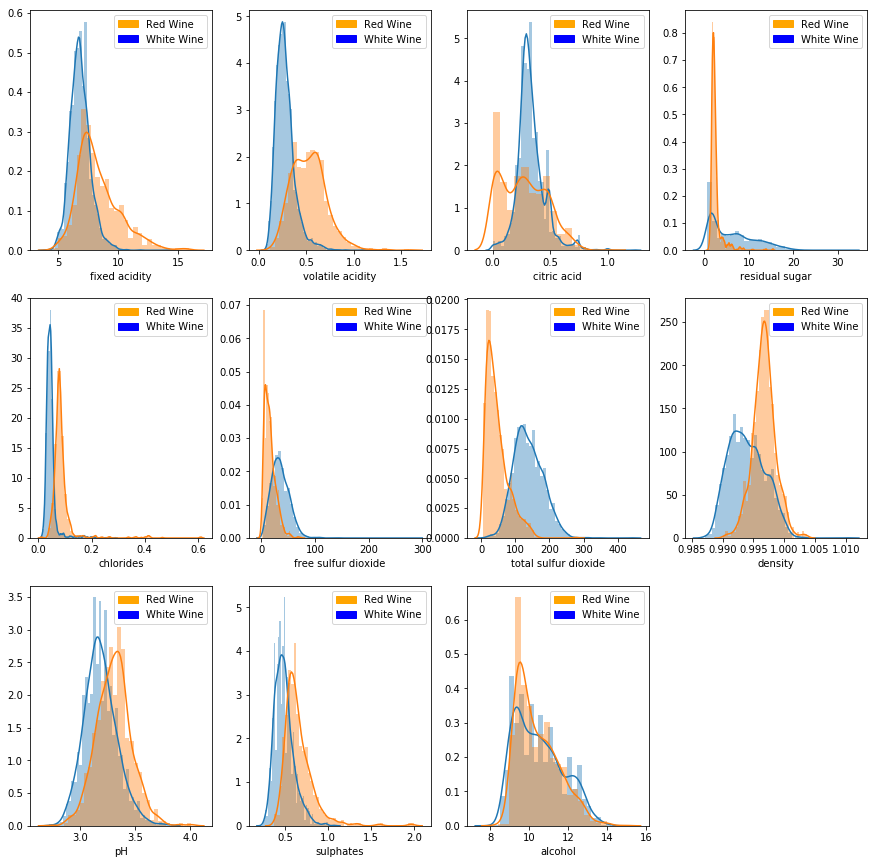

In [24]:
# Répartition des attributs dans les vins
plt.figure(figsize=(15,15))
plt.subplot(341)
sns.distplot(white['fixed acidity'])
sns.distplot(red['fixed acidity'])
orange_patch = mpatches.Patch(color='orange', label='Red Wine')
blue_patch = mpatches.Patch(color='blue', label='White Wine')
plt.legend(handles=[orange_patch, blue_patch])

plt.subplot(342)
sns.distplot(white['volatile acidity'])
sns.distplot(red['volatile acidity'])
orange_patch = mpatches.Patch(color='orange', label='Red Wine')
blue_patch = mpatches.Patch(color='blue', label='White Wine')
plt.legend(handles=[orange_patch, blue_patch])

plt.subplot(343)
sns.distplot(white['citric acid'])
sns.distplot(red['citric acid'])
orange_patch = mpatches.Patch(color='orange', label='Red Wine')
blue_patch = mpatches.Patch(color='blue', label='White Wine')
plt.legend(handles=[orange_patch, blue_patch])

plt.subplot(344)
sns.distplot(white['residual sugar'])
sns.distplot(red['residual sugar'])
orange_patch = mpatches.Patch(color='orange', label='Red Wine')
blue_patch = mpatches.Patch(color='blue', label='White Wine')
plt.legend(handles=[orange_patch, blue_patch])

plt.subplot(345)
sns.distplot(white['chlorides'])
sns.distplot(red['chlorides'])
orange_patch = mpatches.Patch(color='orange', label='Red Wine')
blue_patch = mpatches.Patch(color='blue', label='White Wine')
plt.legend(handles=[orange_patch, blue_patch])

plt.subplot(346)
sns.distplot(white['free sulfur dioxide'])
sns.distplot(red['free sulfur dioxide'])
orange_patch = mpatches.Patch(color='orange', label='Red Wine')
blue_patch = mpatches.Patch(color='blue', label='White Wine')
plt.legend(handles=[orange_patch, blue_patch])

plt.subplot(347)
sns.distplot(white['total sulfur dioxide'])
sns.distplot(red['total sulfur dioxide'])
orange_patch = mpatches.Patch(color='orange', label='Red Wine')
blue_patch = mpatches.Patch(color='blue', label='White Wine')
plt.legend(handles=[orange_patch, blue_patch])

plt.subplot(348)
sns.distplot(white['density'])
sns.distplot(red['density'])
orange_patch = mpatches.Patch(color='orange', label='Red Wine')
blue_patch = mpatches.Patch(color='blue', label='White Wine')
plt.legend(handles=[orange_patch, blue_patch])

plt.subplot(349)
sns.distplot(white['pH'])
sns.distplot(red['pH'])
orange_patch = mpatches.Patch(color='orange', label='Red Wine')
blue_patch = mpatches.Patch(color='blue', label='White Wine')
plt.legend(handles=[orange_patch, blue_patch])

plt.subplot(3,4,10)
sns.distplot(white['sulphates'])
sns.distplot(red['sulphates'])
orange_patch = mpatches.Patch(color='orange', label='Red Wine')
blue_patch = mpatches.Patch(color='blue', label='White Wine')
plt.legend(handles=[orange_patch, blue_patch])

plt.subplot(3,4,11)
sns.distplot(white['alcohol'])
sns.distplot(red['alcohol'])
orange_patch = mpatches.Patch(color='orange', label='Red Wine')
blue_patch = mpatches.Patch(color='blue', label='White Wine')
plt.legend(handles=[orange_patch, blue_patch])

In [ ]:
# get some idea of the data
#fig = plt.figure(figsize=(25,25))
fig, axes = plt.subplots(3, 4)

sns.swarmplot(x="quality", y="fixed acidity", hue="color", data=df, ax=axes[0,0])
plt.title("Wine Quality as explained by Fixed Acidity")

sns.swarmplot(x="quality", y="volatile acidity", hue="color", data=df, ax=axes[0,1])
plt.title("Wine Quality as explained by Volatile Acidity")

sns.swarmplot(x="quality", y="citric acid", hue="color", data=df, ax=axes[0,2])
plt.title("Wine Quality as explained by Citric Acid")

sns.swarmplot(x="quality", y="residual sugar", hue="color", data=df, ax=axes[0,3])
plt.title("Wine Quality as explained by Residual Sugar")

sns.swarmplot(x="quality", y="chlorides", hue="color", data=df, ax=axes[1,0])
plt.title("Wine Quality as explained by Chlorides")

sns.swarmplot(x="quality", y="free sulfur dioxide", hue="color", data=df, ax=axes[1,1])
plt.title("Wine Quality as explained by Free Sulfur Dioxide")

sns.swarmplot(x="quality", y="total sulfur dioxide", hue="color", data=df, ax=axes[1,2])
plt.title("Wine Quality as explained by Total Sulfur Dioxide")

sns.swarmplot(x="quality", y="density", hue="color", data=df, ax=axes[1,3])
plt.title("Wine Quality as explained by Density")

sns.swarmplot(x="quality", y="pH", hue="color", data=df, ax=axes[2,0])
plt.title("Wine Quality as explained by pH")

sns.swarmplot(x="quality", y="sulphates", hue="color", data=df, ax=axes[2,1])
plt.title("Wine Quality as explained by Sulphates")

sns.swarmplot(x="quality", y="alcohol", hue="color", data=df, ax=axes[2,2])
plt.title("Wine Quality as explained by Alcohol")

In [61]:
#plt.figure(figsize=(25,25))
#sns.catplot(x="quality", y="fixed acidity", hue="color", palette=['sandybrown', 'cornflowerblue'], kind="swarm", data=df)
#plt.title("Wine Quality as explained by Fixed Acidity")
plt.figure(figsize=(25,25))
sns.distplot(x="quality", y="fixed acidity", hue="color", palette=['tab:orange', 'tab:blue'], kind="swarm", data=df)
plt.title("Wine Quality as explained by Fixed Acidity")

TypeError: distplot() got an unexpected keyword argument 'x'

<Figure size 1800x1800 with 0 Axes>

Text(0.5, 1.0, 'Wine Quality as explained by Volatile Acidity')

<Figure size 1800x1800 with 0 Axes>

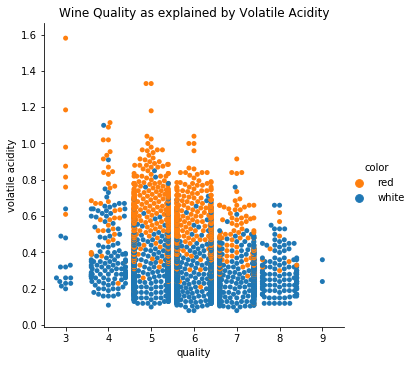

In [51]:
plt.figure(figsize=(25,25))
sns.catplot(x="quality", y="volatile acidity", hue="color", palette=['tab:orange', 'tab:blue'], kind="swarm", data=df)
plt.title("Wine Quality as explained by Volatile Acidity")

Text(0.5, 1.0, 'Wine Quality as explained by Citric Acidity')

<Figure size 1800x1800 with 0 Axes>

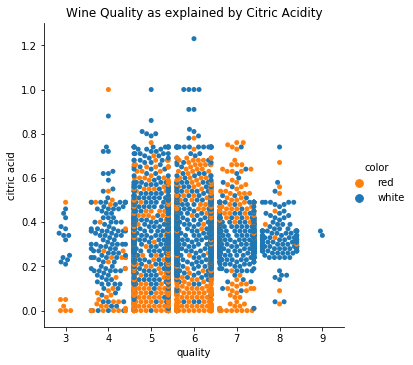

In [52]:
plt.figure(figsize=(25,25))
sns.catplot(x="quality", y="citric acid", hue="color", palette=['tab:orange', 'tab:blue'], kind="swarm", data=df)
plt.title("Wine Quality as explained by Citric Acidity")

Text(0.5, 1.0, 'Wine Quality as explained by Residual Sugar')

<Figure size 1800x1800 with 0 Axes>

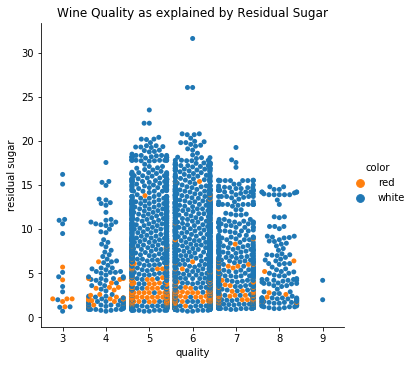

In [53]:
plt.figure(figsize=(25,25))
sns.catplot(x="quality", y="residual sugar", hue="color", palette=['tab:orange', 'tab:blue'], kind="swarm", data=df)
plt.title("Wine Quality as explained by Residual Sugar")

Text(0.5, 1.0, 'Wine Quality as explained by Chlorides')

<Figure size 1800x1800 with 0 Axes>

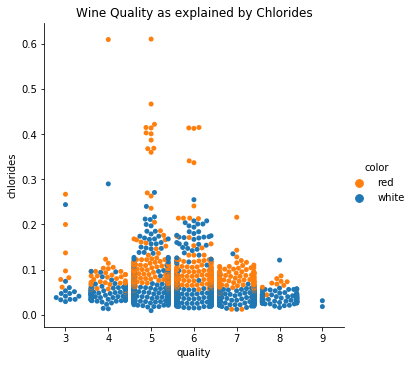

In [54]:
plt.figure(figsize=(25,25))
sns.catplot(x="quality", y="chlorides", hue="color", palette=['tab:orange', 'tab:blue'], kind="swarm", data=df)
plt.title("Wine Quality as explained by Chlorides")

Text(0.5, 1.0, 'Wine Quality as explained by Free Sulfur Dioxide')

<Figure size 1800x1800 with 0 Axes>

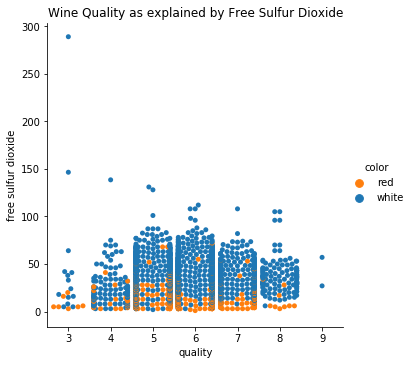

In [55]:
plt.figure(figsize=(25,25))
sns.catplot(x="quality", y="free sulfur dioxide", hue="color", palette=['tab:orange', 'tab:blue'], kind="swarm", data=df)
plt.title("Wine Quality as explained by Free Sulfur Dioxide")

Text(0.5, 1.0, 'Wine Quality as explained by Total Sulfur Dioxide')

<Figure size 1800x1800 with 0 Axes>

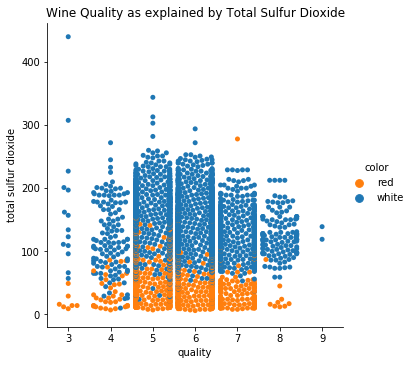

In [56]:
plt.figure(figsize=(25,25))
sns.catplot(x="quality", y="total sulfur dioxide", hue="color", palette=['tab:orange', 'tab:blue'], kind="swarm", data=df)
plt.title("Wine Quality as explained by Total Sulfur Dioxide")

Text(0.5, 1.0, 'Wine Quality as explained by Density')

<Figure size 1800x1800 with 0 Axes>

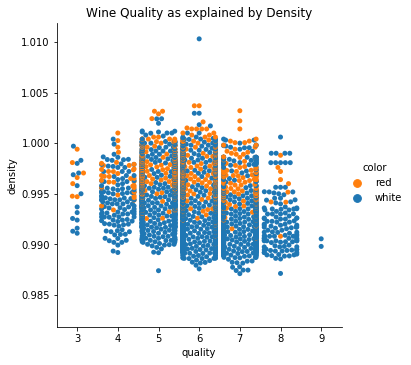

In [57]:
plt.figure(figsize=(25,25))
sns.catplot(x="quality", y="density", hue="color", palette=['tab:orange', 'tab:blue'], kind="swarm", data=df)
plt.title("Wine Quality as explained by Density")

Text(0.5, 1.0, 'Wine Quality as explained by pH')

<Figure size 1800x1800 with 0 Axes>

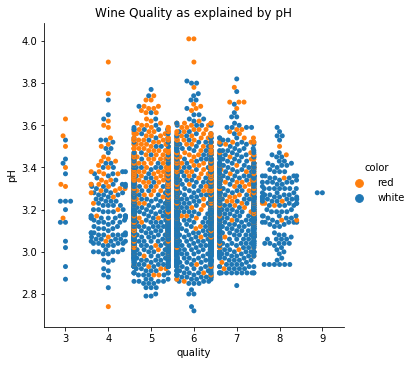

In [58]:
plt.figure(figsize=(25,25))
sns.catplot(x="quality", y="pH", hue="color", palette=['tab:orange', 'tab:blue'], kind="swarm", data=df)
plt.title("Wine Quality as explained by pH")

Text(0.5, 1.0, 'Wine Quality as explained by Sulphates')

<Figure size 1800x1800 with 0 Axes>

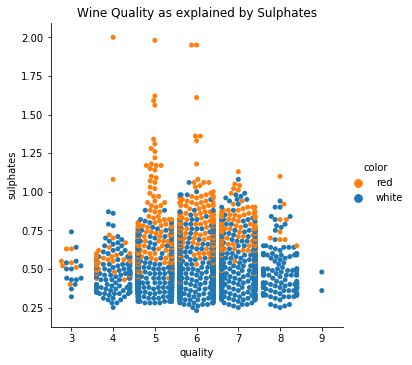

In [59]:
plt.figure(figsize=(25,25))
sns.catplot(x="quality", y="sulphates", hue="color", palette=['tab:orange', 'tab:blue'], kind="swarm", data=df)
plt.title("Wine Quality as explained by Sulphates")

Text(0.5, 1.0, 'Wine Quality as explained by Alcohol')

<Figure size 1800x1800 with 0 Axes>

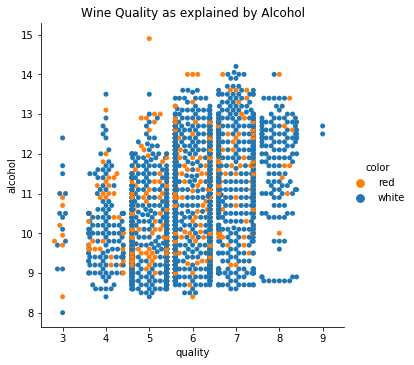

In [60]:
plt.figure(figsize=(25,25))
sns.catplot(x="quality", y="alcohol", hue="color", palette=['tab:orange', 'tab:blue'], kind="swarm", data=df)
plt.title("Wine Quality as explained by Alcohol")

Text(0.5, 1.0, 'Wine Quality as explained by Fixed Acidity')

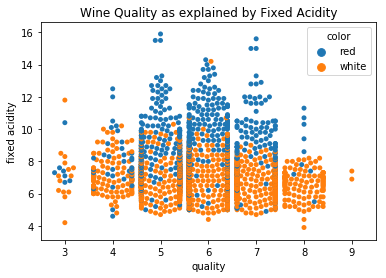

In [37]:
sns.swarmplot(x="quality", y="fixed acidity", hue="color", data=df)
plt.title("Wine Quality as explained by Fixed Acidity")

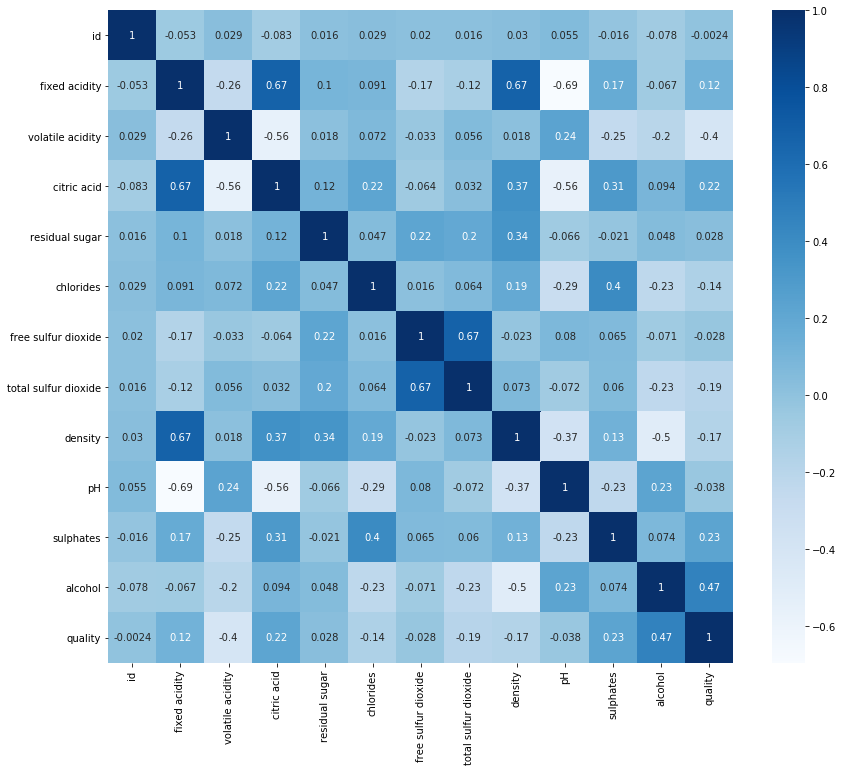

In [11]:
# check the correlation between the variables
# compute the correlation matrix
correlation_matrix_red = red.corr()
figure = plt.figure(figsize = (14,12))
sns.heatmap(correlation_matrix_red, annot=True, cmap=plt.cm.Blues)
plt.show()

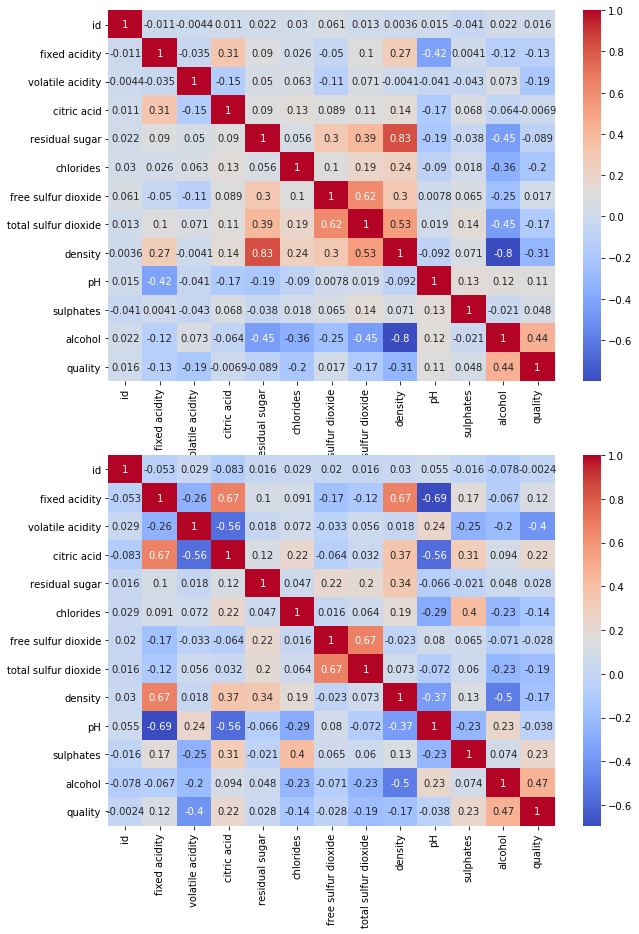

In [25]:
# check the correlation between the variables
# compute the correlation matrix
correlation_matrix_white = white.corr()
figure = plt.figure(figsize = (10,15))
plt.subplot(211)
sns.heatmap(correlation_matrix_white, annot=True, cmap=plt.cm.coolwarm)
plt.subplot(212)
sns.heatmap(correlation_matrix_red, annot=True, cmap=plt.cm.coolwarm)
plt.show()

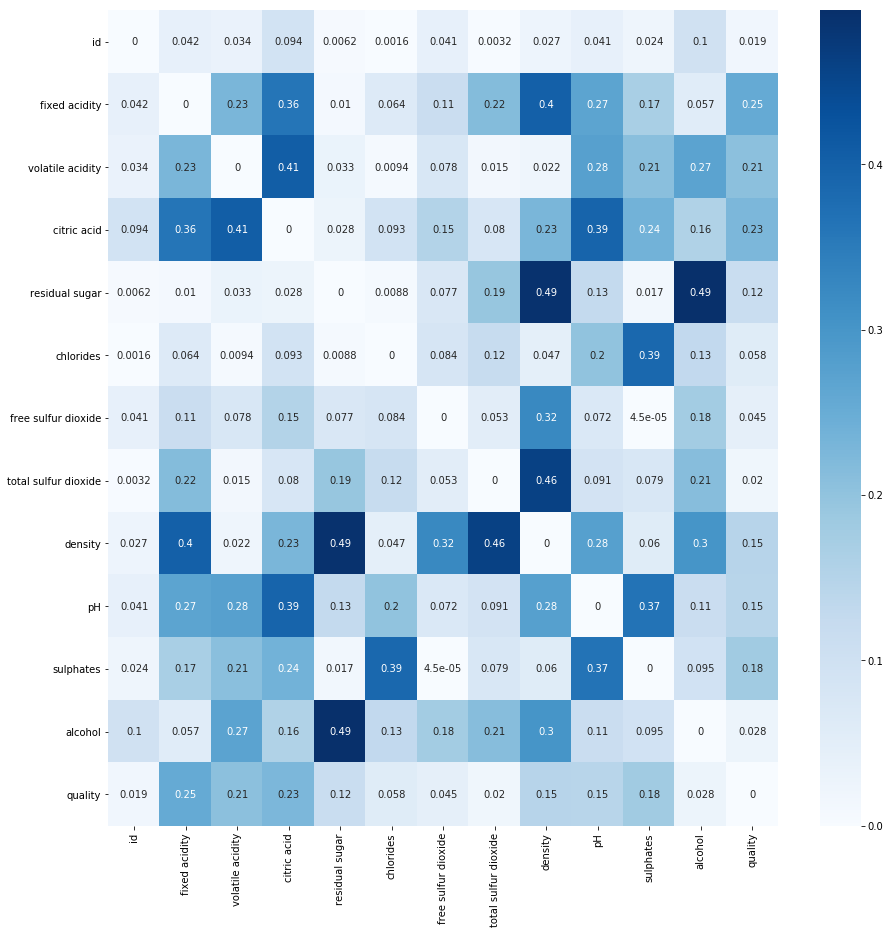

In [19]:
correlation_matrix = abs(correlation_matrix_white - correlation_matrix_red)
figure = plt.figure(figsize = (15,15))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Blues)
plt.show()

ValueError: could not convert string to float: 'white'

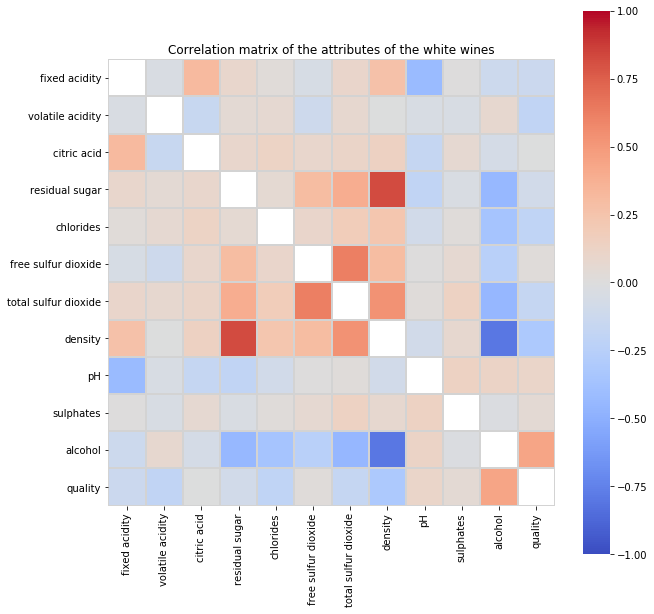

In [96]:
corr = white.corr()
#print(corr.round(2))
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True #delete top half of triangle
for i in range(mask.shape[0]):
    mask[i,i] = True

# Set up the matplotlib figure
plt.figure(figsize=(10,10))

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.coolwarm, vmin=-1, vmax=1,
            square=True, linecolor="lightgrey", linewidths=1)
plt.title("Correlation matrix of the attributes of the white wines")
plt.show()

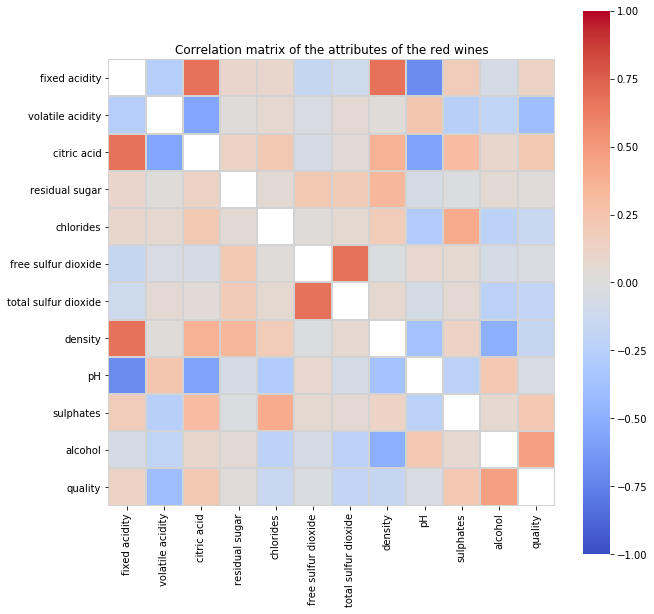

In [98]:

corr = red.corr()
#print(corr.round(2))
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True #delete top half of triangle
for i in range(mask.shape[0]):
    mask[i,i] = True

# Set up the matplotlib figure
plt.figure(figsize=(10,10))

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.coolwarm, vmin=-1, vmax=1,
            square=True, linecolor="lightgrey", linewidths=1)
plt.title("Correlation matrix of the attributes of the red wines")
plt.show()

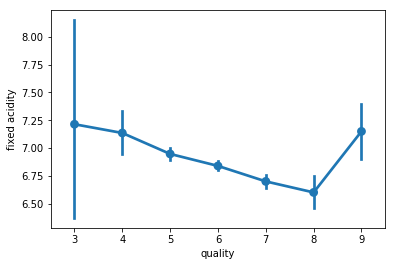

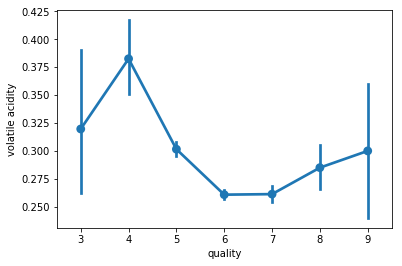

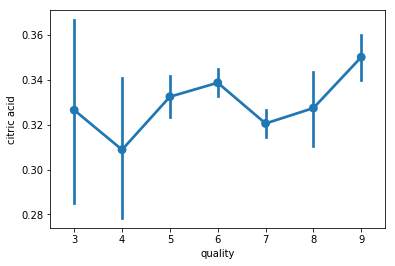

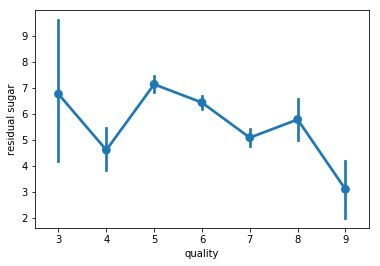

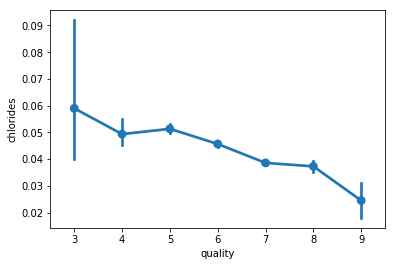

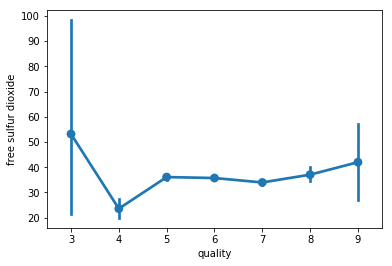

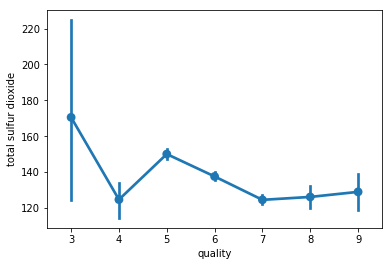

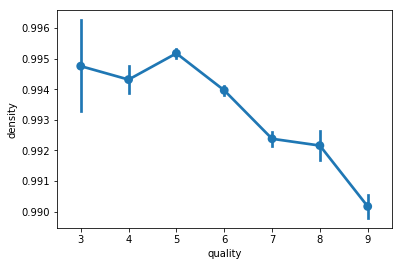

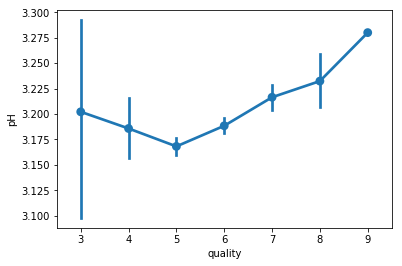

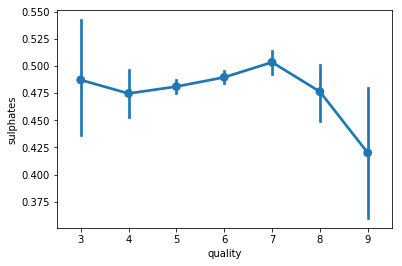

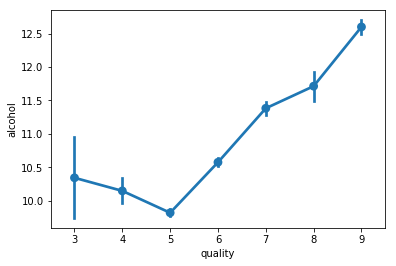

In [100]:
for i in list(white)[0:11]:
    sns.pointplot(x='quality', y=i, data=)
    plt.show()

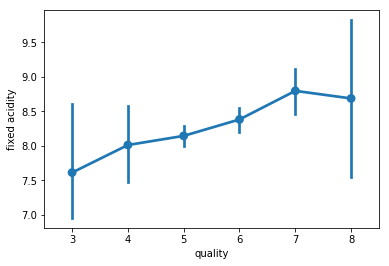

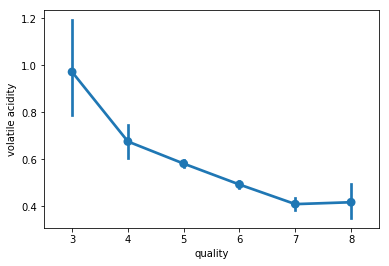

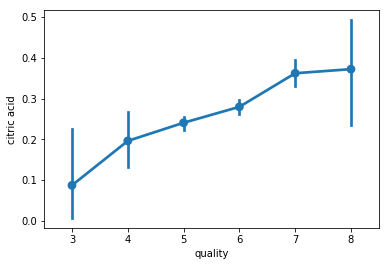

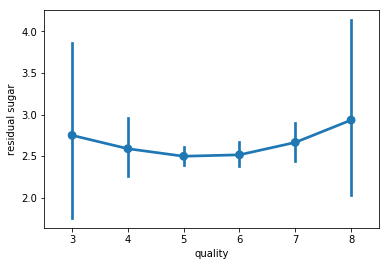

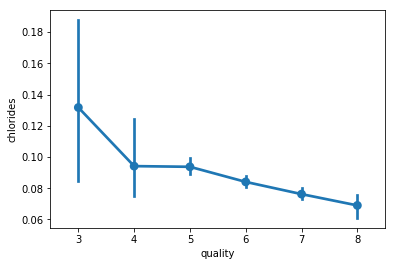

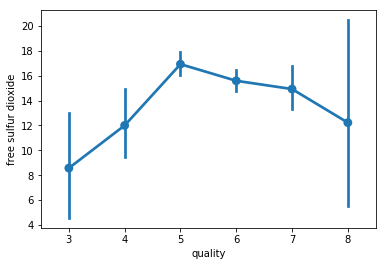

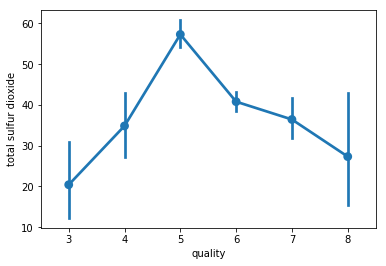

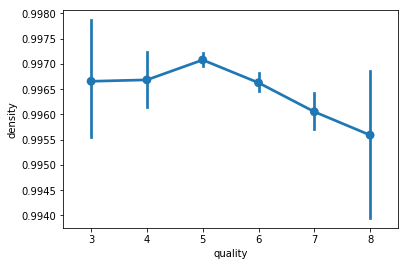

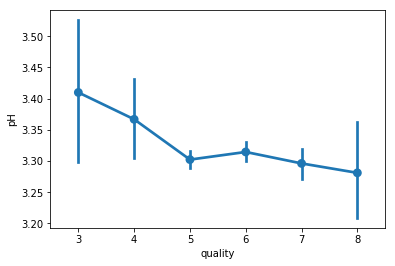

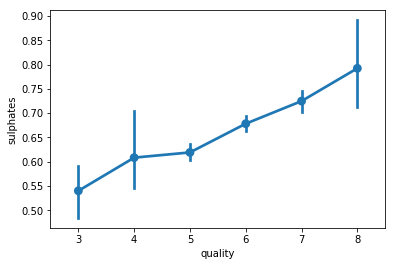

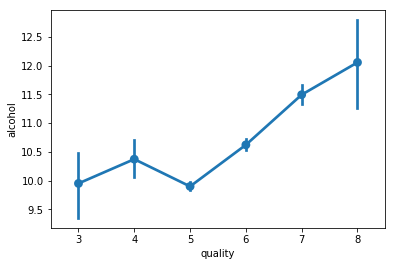

In [101]:
for i in list(red)[0:11]:
    sns.pointplot(x='quality', y=i, data=red)
    plt.show()